# Homework 1

**Q1:** What proportion of students who answer this question quickly will pass the class? Assume the probability of passing the class is 0.9. Assume the probability of answering this question quickly is 0.6 if you'll pass the class, while the probability drops to 0.3 if you'll not pass the class. 

In [36]:
# Calculating the proportion of students who answer quickly and pass the class (Q1)
# Using Bayes' Theorem: P(pass | quick) = (P(quick | pass) * P(pass)) / P(quick)

# Given probabilities
P_pass = 0.9
P_answer_quick_pass = 0.6
P_answer_quick_not_pass = 0.3

# Using the Law of Total Probability to calculate P(quick)
P_not_pass = 1 - P_pass
P_quick = (P_answer_quick_pass * P_pass) + (P_answer_quick_not_pass * P_not_pass)

# Applying Bayes' Theorem
P_pass_answer_quick = (P_answer_quick_pass * P_pass) / P_quick

P_pass_answer_quick


0.9473684210526315

The proportion of students who answer the question quickly and will pass the class is approximately 94.74%.

**Q2:** \begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

----
Sovle by using Bayes Theorem:
$$p(\theta| x, n, \alpha) \propto p(x | \theta, n) \cdot p(\theta | \alpha)$$

Likelihood $$p(x | \theta, n) = \frac{n!}{x_1! x_2! ... x_k!} \prod_{i=1}^k \theta_i^{x_i}$$

Prior $$p(\theta | \alpha) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}, \quad \text{where } B(\alpha) = \frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma(\sum_{i=1}^k \alpha_i)}$$

Posterior $$p(\theta | x, n, \alpha) \propto \prod_{i=1}^k \theta_i^{x_i} \cdot \prod_{i=1}^k \theta_i^{\alpha_i - 1}$$

Combine terms:
$$p(\theta | x, n, \alpha) \propto \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1}$$

This corresponds to the kernel of a Dirichlet distribution:
$$ p(\theta | x, n, \alpha) = \text{Dirichlet}(\alpha_1 + x_1, \alpha_2 + x_2, ..., \alpha_k + x_k)$$

---

As shown above, the posterior distribution is a **Dirichlet distribution** with parameters:
$$ \boldsymbol{\alpha}_{\text{posterior}} = (\alpha_1 + x_1, \alpha_2 + x_2, ..., \alpha_k + x_k)$$


**Q3:** Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

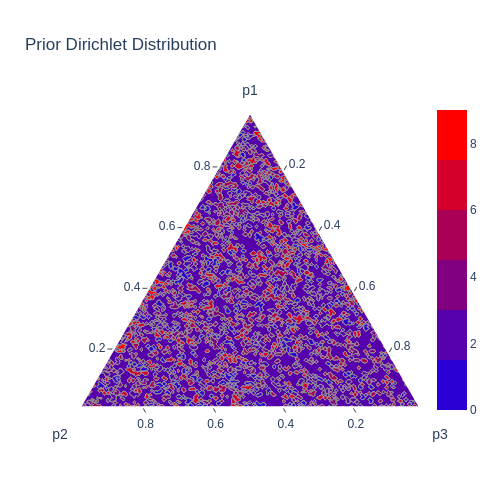

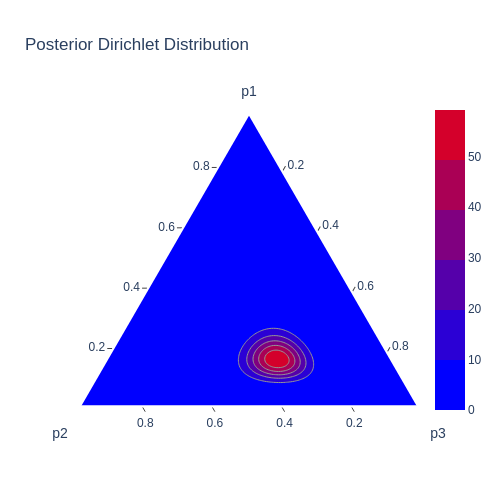

In [37]:
# Importing necessary libraries
from scipy.stats import dirichlet
import plotly.figure_factory as ff


# Generate grid points for the simplex
n_points = 100
p1 = np.linspace(0, 1, n_points)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, n_points)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

# Define parameters for prior and posterior Dirichlet distributions
data_counts = np.array([10, 20, 30])  # set counts for 3 categories
alpha_prior = np.array([1, 1, 1])  # Uniform prior

# Posterior parameters
alpha_posterior = alpha_prior + data_counts

# Compute Dirichlet densities for prior and posterior
dirichlet_prior = dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

dirichlet_posterior = dirichlet(alpha=alpha_posterior)
dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

# Create ternary contour plot for Prior Dirichlet Distribution
fig_prior = ff.create_ternary_contour(
    p.T, dirichlet_prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    title="Prior Dirichlet Distribution",
    interp_mode='cartesian',
    showscale=True
)

# Create ternary contour plot for Posterior Dirichlet Distribution
fig_posterior = ff.create_ternary_contour(
    p.T, dirichlet_posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    title="Posterior Dirichlet Distribution",
    interp_mode='cartesian',
    showscale=True
)
fig_prior.show("png")
fig_posterior.show("png")

Prior Dirichlet Distribution: The plot represents the uniform prior belief with $\alpha = [1,1,1]$. The density is relatively uniform across the simplex, as expected for a uniform prior.

Posterior Dirichlet Distribution: The posterior parameters $\alpha = [1+10,1+20,1+30]=[11,21,31]$ update the prior based on observed counts for each category. This plot shows a concentrated density in the region of the simplex corresponding to the observed proportions, reflecting the updated belief.